In [1]:
import os
import glob
import json

import numpy as np

import imageio
import matplotlib.pyplot as plt

import pickle

import MBLab as mbl
import transformations as tr
import HandBase as hm


In [2]:
PATH_TO_DATASET = "test_data/mbl/2018.12.27/"
frame_path_list = sorted(glob.glob(os.path.join(PATH_TO_DATASET, "*/frame/*.png")))
frame_path_list.__len__()

5

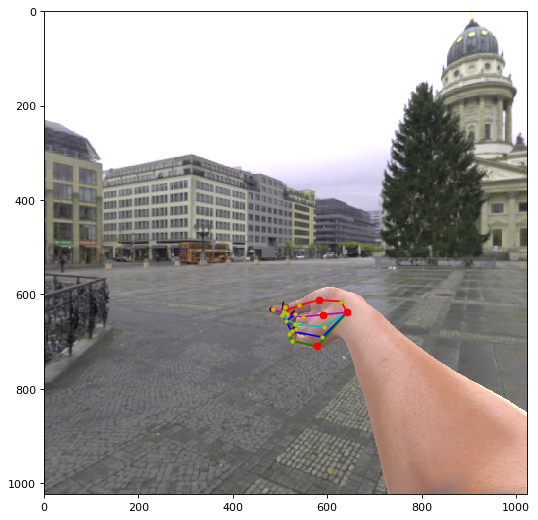

In [3]:
IMG_NUM = 1

frame_path = frame_path_list[IMG_NUM]

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
frame_data = imageio.imread(frame_path).astype(np.float)/255.
sz = frame_data.shape

skeleton2d_path = frame_path.replace('/frame/','/skeleton_2d/').replace('.png','.json')
skeleton3d_path = frame_path.replace('/frame/','/skeleton_3d/').replace('.png','.json')
camera_meta_path = frame_path.replace('/frame/','/camera_meta/').replace('.png','.json')
bg_mask_path = frame_path.replace('/frame/','/background_mask/')

with open(skeleton2d_path, 'r') as f:
    sk2d = json.load(f)

with open(skeleton3d_path, 'r') as f:
    sk3d = json.load(f)

with open(camera_meta_path, 'r') as f:
    cam_meta = json.load(f)

mblh = hm.MBLHand()
bh = hm.BaseHand()

pts3d = mblh.bones2pts3d(sk3d,lr='R')

dat2d = mblh.project_pts(pts3d, cam_meta, sz)

bh.plot_hand(dat2d)

plt.imshow(frame_data)
plt.show()

In [4]:
IMG_NUM = 1

frame_path = frame_path_list[IMG_NUM]

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
frame_data = imageio.imread(frame_path).astype(np.float)/255.
sz = frame_data.shape

skeleton2d_path = frame_path.replace('/frame/','/skeleton_2d/').replace('.png','.json')
skeleton3d_path = frame_path.replace('/frame/','/skeleton_3d/').replace('.png','.json')
camera_meta_path = frame_path.replace('/frame/','/camera_meta/').replace('.png','.json')
bg_mask_path = frame_path.replace('/frame/','/background_mask/')

with open(skeleton2d_path, 'r') as f:
    sk2d = json.load(f)

with open(skeleton3d_path, 'r') as f:
    sk3d = json.load(f)

with open(camera_meta_path, 'r') as f:
    cam_meta = json.load(f)

mblh = hm.MBLHand()
pts2d = mblh.bones2pts2d(sk2d,lr='R')
pts3d = mblh.bones2pts3d(sk3d,lr='R')

# move pts center to zero point
c3d = np.mean(pts3d,axis=0)
pts3d[:,0] -= c3d[0]
pts3d[:,1] -= c3d[1]
pts3d[:,2] -= c3d[2]

bh = hm.BaseHand()
kpts2d = bh.get_keypoints(pts2d)
kpts3d = bh.get_keypoints(pts3d)
# pose = bh.fit_pose_2d(kpts2d, kpts3d)
pose = bh.fit_pose_2d(pts2d, pts3d)

p3d = bh.transform_pts(pts3d, pose)
dat2d = bh.project_pts(p3d, imSz = sz)

bh.plot_hand(dat2d)

plt.imshow(frame_data)
plt.show()

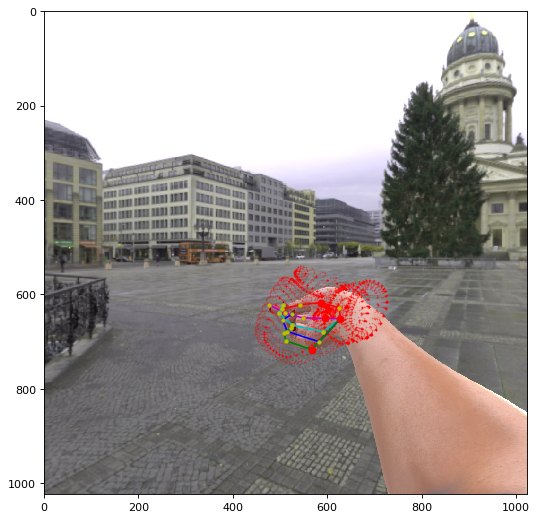

In [5]:
IMG_NUM = 1

frame_path = frame_path_list[IMG_NUM]

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
frame_data = imageio.imread(frame_path).astype(np.float)/255.
sz = frame_data.shape

skeleton2d_path = frame_path.replace('/frame/','/skeleton_2d/').replace('.png','.json')
skeleton3d_path = frame_path.replace('/frame/','/skeleton_3d/').replace('.png','.json')
camera_meta_path = frame_path.replace('/frame/','/camera_meta/').replace('.png','.json')
bg_mask_path = frame_path.replace('/frame/','/background_mask/')

with open(skeleton2d_path, 'r') as f:
    sk2d = json.load(f)

with open(skeleton3d_path, 'r') as f:
    sk3d = json.load(f)

with open(camera_meta_path, 'r') as f:
    cam_meta = json.load(f)

mblh = hm.MBLHand()
pts2d = mblh.bones2pts2d(sk2d,lr='R')
pts3d = mblh.bones2pts3d(sk3d,lr='R')

# move pts center to zero point
c3d = np.mean(pts3d,axis=0)
for ii in range(3):
    pts3d[:,ii] -= c3d[ii]

bh = hm.BaseHand()
kpts2d = bh.get_keypoints(pts2d)
kpts3d = bh.get_keypoints(pts3d)
pose = bh.fit_pose_2d(kpts2d, kpts3d)
# pose = bh.fit_pose_2d(pts2d, pts3d)

dat3d = bh.transform_pts(pts3d, pose)

bg = hm.BoxingGloves()
bgverts = bg.get_verts(lr='R')
bgkpts = bg.get_keypoints(lr='R')

# bkc = np.mean(bgkpts,axis=0)

p1 = bh.fit_pose_3d(bh.get_keypoints(dat3d), bgkpts)

U1 = p1[0]
s1 = p1[1]
t1 = p1[2]

bgverts = np.dot(bgverts,U1)
bgverts *= s1
for ii in range(3):
    bgverts[:,ii] += t1[ii]

dat2d = bh.project_pts(dat3d, imSz = sz)
bg2d = bh.project_pts(bgverts, imSz = sz)
    
bh.plot_hand(dat2d)

plt.scatter(bg2d[:,0],bg2d[:,1],s=0.03,c='r')

plt.imshow(frame_data)
plt.show()